# Linear Convolutional Network Plots

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import LogNorm
Cout = [1, 2, 4, 8]
T = 10

# Read arrays
def get_betas(pair):
    beta_trials = []
    for t in range(T):
        betas = []
        name = "experiments-data/" + "betas-linear" + str(pair) + str(t)+ ".csv"
        beta = pd.read_csv(name, header=None).values.astype(np.float)
        beta_trials.append(beta)
    return beta_trials

def get_rbetas(pair):
    name =  "experiments-data/" + str(pair) + "rbetas-linear" + ".csv"   
    rbetas = pd.read_csv(name, header=None).values.astype(np.float)
    return rbetas

def get_betas_all(k):
    betas_all = []
    for c in Cout:
        pair = (k, c)
        beta = get_betas(pair)
        betas_all.append(beta)
    return betas_all

def get_rbetas_all(k):
    rbetas_all = []
    for c in Cout:
        pair = (k, c)
        rbetas = get_rbetas(pair)
        rbetas_all.append(rbetas)
    return rbetas_all


In [62]:
# Get rbeta values
k = 8
rbetas_all = get_rbetas_all(k)

means = []
variances = []
for i in range(len(Cout)):
    sorted_vec = np.sort(rbetas_all[i])
#     print("Cout=" + str(i) + ": rbetas are " + str(sorted_vec))
    means.append(np.mean(rbetas_all[i]))
    variances.append(np.var(rbetas_all[i]))
    
for i in range(len(Cout)):
    print(str(np.round(means[i], 2)) + "\pm " + str(np.format_float_scientific(np.sqrt(variances)[i], exp_digits=2, precision=2)))



3.35\pm 4.01e-02
3.3\pm 3.58e-02
3.29\pm 1.46e-02
3.29\pm 1.83e-02


5


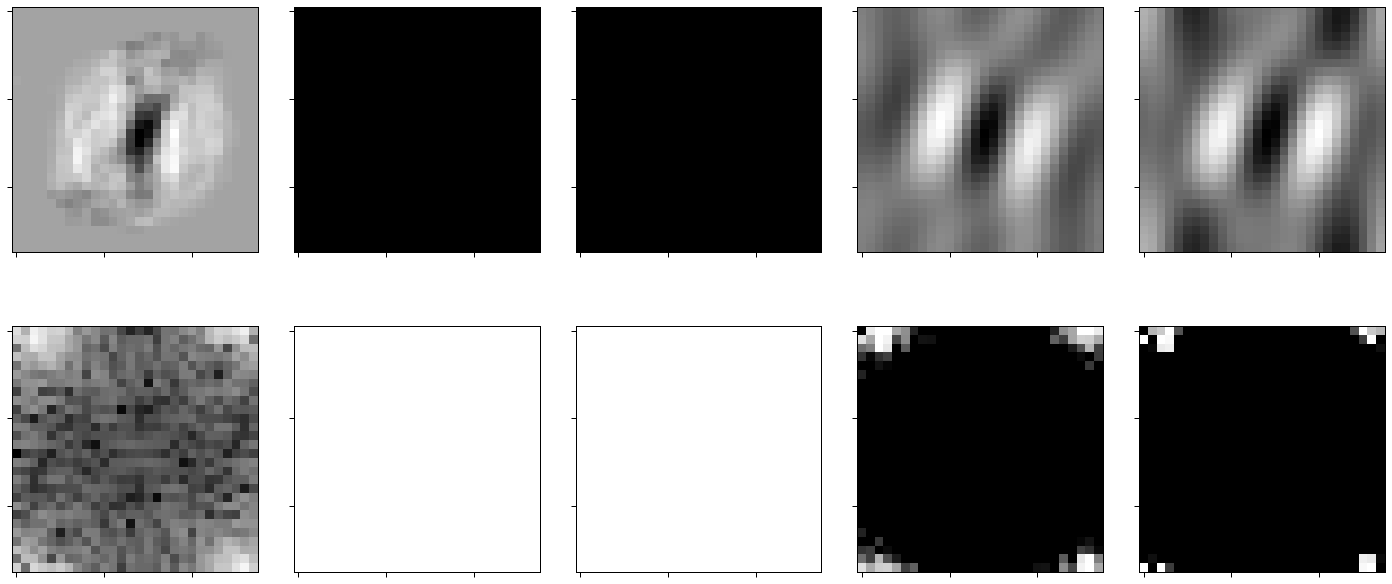

In [30]:
# Plot betas
betas_all = []
ks = [1,3, 8, 16, 28]
for k in ks:
    betas = get_sample_betas(k)
    betas_all.append(betas)

print(len(betas_all))

cout = 0
def plot():
    beta_to_plot_time = []
    beta_to_plot_freq = []
    for k in range(len(ks)):
        beta = np.copy(betas_all[k][cout])
        beta_to_plot_time.append(beta)
#         print(beta.shape)
#         print(np.fft.fft2(beta, norm='ortho').shape)
        beta_to_plot_freq.append(np.abs(np.fft.fft2(beta, norm='ortho')))

    # Compute beta for linear CNNs
    sns.set_context("paper",font_scale=3, rc={"lines.linewidth":1})
    fig, axs = plt.subplots(2, 5, figsize=(20,10))
    for k in range(len(ks)):
        axs[0][k].imshow(beta_to_plot_time[k],cmap='gray')
        axs[0][k].set_xticklabels([])
        axs[0][k].set_yticklabels([])
        
        axs[1][k].imshow(beta_to_plot_freq[k],cmap='gray', norm=LogNorm(vmin=0.0001, vmax=0.08))
        axs[1][k].set_xticklabels([])
        axs[1][k].set_yticklabels([])

    plt.tight_layout() # for some reason not using tight_layout before savefig messes some borders up
    name = "plots/many-channels" + str(Cout[cout]) + ".pdf"
    plt.savefig(name, format='pdf')

    plt.show()

plot()

# Nonlinear Convolutional Network Plots

In [50]:
T = 3
def get_rbetas_nonlinear_bias(pair):
    name =  "experiments-data/" + str(pair) + "rbetas-nonlinear-bias" + ".csv"   
    rbetas = pd.read_csv(name, header=None).values.astype(np.float)
    return rbetas


def get_rbetas_all_nonlinear_bias(k):
    rbetas_all = []
    for c in Cout:
        pair = (k, c)
        rbetas = get_rbetas_nonlinear_bias(pair)
        rbetas_all.append(rbetas)
    return rbetas_all


def get_rbetas_nonlinear(pair):
    name =  "experiments-data/" + str(pair) + "rbetas-nonlinear" + ".csv"
    rbetas = pd.read_csv(name, header=None).values.astype(np.float)
    return rbetas


def get_rbetas_all_nonlinear(k):
    rbetas_all = []
    for c in Cout:
        pair = (k, c)
        rbetas = get_rbetas_nonlinear(pair)
        rbetas_all.append(rbetas)
    return rbetas_all


def get_medians_nonlinear(k):
    rbetas_all = get_rbetas_all_nonlinear(k)
    medians = []

    for i in range(len(Cout)):
        sorted_vec = np.sort(rbetas_all[i])
        print("Cout=" + str(i) + ": rbetas are " + str(sorted_vec))
        medians.append(np.median(rbetas_all[i]))
    
    for i in range(len(Cout)):
        print(str(np.round(medians[i], 3)))
        
def get_medians_nonlinear_bias(k):
    rbetas_all = get_rbetas_all_nonlinear_bias(k)
    medians = []

    for i in range(len(Cout)):
        sorted_vec = np.sort(rbetas_all[i])
        print("Cout=" + str(i) + ": rbetas are " + str(sorted_vec))
        medians.append(np.median(rbetas_all[i]))

    for i in range(len(Cout)):
        print(str(np.round(medians[i], 3)))


In [55]:
k = 1

print("With bias")
get_medians_nonlinear_bias(k)

print("Without bias")
get_medians_nonlinear(k)

With bias
Cout=0: rbetas are [[22.98060067]
 [10.56706548]
 [10.57813307]
 [19.11011389]
 [10.58097863]]
Cout=1: rbetas are [[10.56908209]
 [10.58230089]
 [10.57123763]
 [10.56794842]
 [10.58065839]]
Cout=2: rbetas are [[20.00965623]
 [10.5775848 ]
 [10.57738424]
 [10.57281013]
 [10.58207472]]
Cout=3: rbetas are [[10.57260352]
 [10.57549358]
 [10.58131186]
 [10.57604943]
 [10.58040739]]
10.581
10.571
10.578
10.576
Without bias
Cout=0: rbetas are [[ 11.4118916 ]
 [ 11.41177177]
 [109.47130905]
 [ 11.41195909]
 [ 11.41184855]]
Cout=1: rbetas are [[ 11.41387834]
 [ 11.41290243]
 [109.47386582]
 [ 11.41193824]
 [ 11.41315423]]
Cout=2: rbetas are [[11.41386882]
 [11.4139749 ]
 [11.41703692]
 [11.41647683]
 [11.41439695]]
Cout=3: rbetas are [[11.41304968]
 [11.4195499 ]
 [11.41361214]
 [11.41484352]
 [11.41579989]]
11.412
11.413
11.414
11.415


# CVXPY plots

In [32]:
name =  "experiments-data/cvxpy-ell2"
beta_ell2 = pd.read_csv(name, header=None).values.astype(np.float)

name =  "experiments-data/cvxpy-ell1"
beta_ell1 = pd.read_csv(name, header=None).values.astype(np.float)

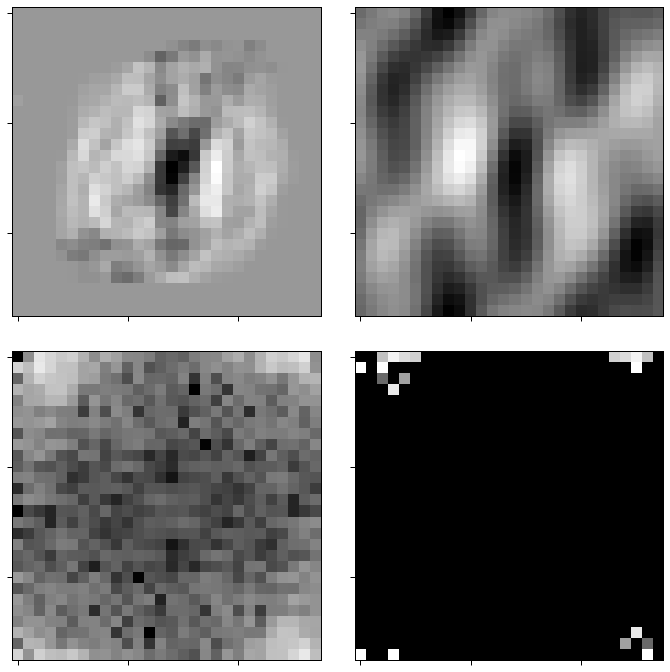

In [34]:

beta_to_plot_time = []
beta_to_plot_freq = []
beta_to_plot_time.append(beta_ell2)
beta_to_plot_freq.append(np.abs(np.fft.fft2(beta_ell2, norm='ortho')))

beta_to_plot_time.append(beta_ell1)
beta_to_plot_freq.append(np.abs(np.fft.fft2(beta_ell1, norm='ortho')))

# Compute beta for linear CNNs
sns.set_context("paper",font_scale=3, rc={"lines.linewidth":1})
fig, axs = plt.subplots(2, 2, figsize=(10,10))
for k in range(2):
    axs[0][k].imshow(beta_to_plot_time[k],cmap='gray')
    axs[0][k].set_xticklabels([])
    axs[0][k].set_yticklabels([])

    axs[1][k].imshow(beta_to_plot_freq[k],cmap='gray', norm=LogNorm(vmin=0.0001, vmax=0.08))
    axs[1][k].set_xticklabels([])
    axs[1][k].set_yticklabels([])

plt.tight_layout() # for some reason not using tight_layout before savefig messes some borders up
name = "plots/cvxpy" + ".pdf"
plt.savefig(name, format='pdf')

plt.show()
